## Boston house data
Example taken from [here](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

In [44]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### Load data

In [14]:
df = pandas.read_csv("housing.data.txt", delim_whitespace=True, header=None)
dataset = df.values


### split into input (X) and output (Y) variables

In [15]:
X = dataset[:,0:13]
Y = dataset[:,13]

### define base model

In [16]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [17]:
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [18]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)



## Cross validation

In [19]:
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)

print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -21.92 (22.33) MSE


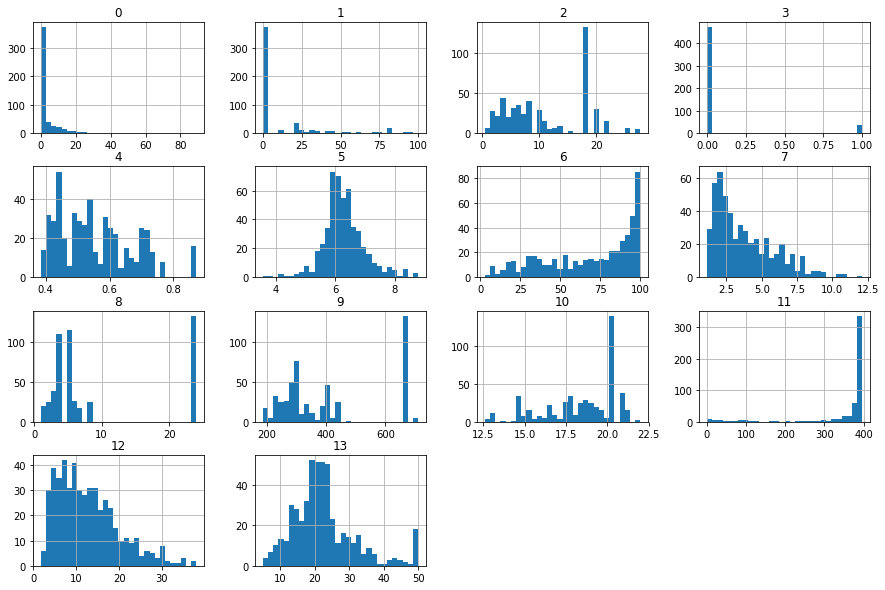

In [21]:
df.hist(bins=30);

In [26]:
X.shape

(506, 13)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33)

In [37]:
pipeline.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x14ecdce10>)],
         verbose=False)

In [40]:
y_pred = pipeline.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8167379404300785

In [47]:
linear_estimator = LinearRegression()
linear_estimator.fit(X_train, y_train)
y_pred_linear = linear_estimator.predict(X_test)

In [50]:
linear_estimator.score(X_test, y_test)

0.7323519058740648

In [58]:
r2_score(y_test, y_pred_linear)

0.7323519058740648

In [55]:
pipeline.score(X_test, y_test)

-15.649789394732721

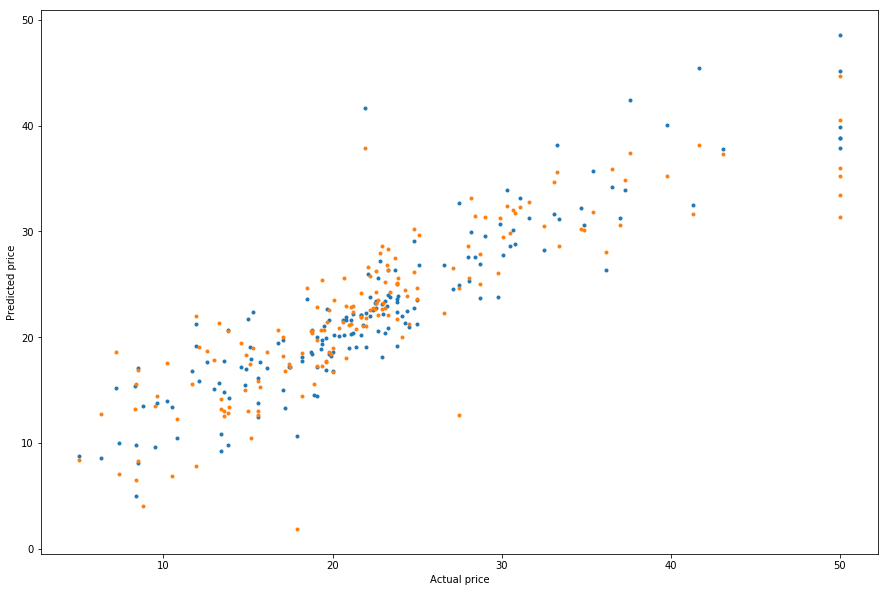

In [49]:
fig,ax = plt.subplots()
ax.plot(y_test, y_pred, '.', label='keras')
ax.plot(y_test, y_pred_linear, '.', label='linear')
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted price');